# Speed and Air Time analysis of NYC 2013 flights

In [1]:
#imports

#packages for data manipulation, munging and merging

import pandas as pd
import numpy as np

#packages for visualiztion and exploratory analysis

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

In [2]:
#reading data from source

#nyfd = pd.read_csv('flight_data_cleaned.csv')

nyfd = pd.read_csv("D:/DataScience/DS-Foundation/Project/NYC Flight Data Project DSF/Master/flight_data_cleaned.csv")

In [3]:
#viewing columns of the loaded dataset

print(nyfd.columns.values)

['year' 'month' 'day' 'dep_time' 'sched_dep_time' 'dep_delay' 'arr_time'
 'sched_arr_time' 'arr_delay' 'carrier' 'flight' 'tailnum' 'origin' 'dest'
 'air_time' 'distance' 'hour' 'minute' 'time_hour']


In [4]:
# Check few sample values of flight data set

nyfd.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-13 5:00
1,2013,1,1,533,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-13 5:00
2,2013,1,1,542,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-13 5:00
3,2013,1,1,544,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-13 5:00
4,2013,1,1,554,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-13 6:00


In [5]:
nyfd.tail(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336766,2013,9,30,2240,2250,-10.000000,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,30-09-13 22:00
336767,2013,9,30,2241,2246,-5.000000,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,30-09-13 22:00
336768,2013,9,30,2307,2255,12.000000,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,30-09-13 22:00
336769,2013,9,30,2349,2359,-10.000000,325.0,350,-25.0,B6,745,N516JB,JFK,PSE,196.0,1617,23,59,30-09-13 23:00
336770,2013,9,30,1850,1842,8.237970,2044.0,2019,25.0,EV,5274,N740EV,LGA,BNA,114.0,764,18,42,30-09-13 18:00
336771,2013,9,30,1503,1455,7.754232,1551.0,1634,-43.0,9E,3393,NaN,JFK,DCA,48.0,213,14,55,30-09-13 14:00
336772,2013,9,30,2208,2200,7.754232,2246.0,2312,-26.0,9E,3525,NaN,LGA,SYR,38.0,198,22,0,30-09-13 22:00
336773,2013,9,30,1215,1210,5.350545,1409.0,1330,39.0,MQ,3461,N535MQ,LGA,BNA,114.0,764,12,10,30-09-13 12:00
336774,2013,9,30,1204,1159,5.350545,1313.0,1344,-31.0,MQ,3572,N511MQ,LGA,CLE,69.0,419,11,59,30-09-13 11:00
336775,2013,9,30,845,840,5.350545,956.0,1020,-24.0,MQ,3531,N839MQ,LGA,RDU,71.0,431,8,40,30-09-13 8:00


In [6]:
# Get information on flight dataset

nyfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          336776 non-null int64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null float64
arr_time          336775 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336775 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          336775 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(4), int64(10), object(5)
memory usage: 48.8+ MB


# Initial insights on Air time, Distance and Speed of Aircrafts

**Air Time** of an air craft is the amount of time that a flight spent in air. It is completely different different from **Journey Time**. As **Journey Time** sometimes include a longer haul time.

**Speed** of Aircraft can be calculated using **Air Time and Distance**. Thus we initially focus on specif columns of data such as "air_time", "distance" initially.

From the basic formula of physics, **"Speed = (Distance/Time)"** we can find the actual speed of aircraft.

Here, 'air_time' is in Minutes and 'distance' is in Miles. But usually Speed of Aircraft is measured in Miles Per Hour. So, we need to convert the 'air_time' into Hours to get the speed in standard notation i.e., MpH.


In [107]:
#calculating speed of aircraft in Miles per hour
def speed_cal(t,d):
    return (d/t)*60

#dropping rows with air_time as Null from NYFD
air_nn = nyfd['air_time'].notnull()  #only one record
air = nyfd[air_nn]

#creating a new dataset with columns 'air_time', 'distance' that are helpful for speed analysis
air = air.filter(['air_time', 'distance'], axis=1)

#creating a new column for 'speed' and concatinating with DataFrame 'air'
speed = pd.DataFrame(speed_cal(air.air_time,air.distance))
air['speed'] = np.round(speed)
air

,air_time,distance,speed
0,227.0,1400,370.0
1,227.0,1416,374.0
2,160.0,1089,408.0
3,183.0,1576,517.0
4,116.0,762,394.0
5,150.0,719,288.0
6,158.0,1065,404.0
7,53.0,229,259.0
8,140.0,944,405.0
9,138.0,733,319.0


In [8]:
air.head(10)

,air_time,distance,speed
0,227.0,1400,370.0
1,227.0,1416,374.0
2,160.0,1089,408.0
3,183.0,1576,517.0
4,116.0,762,394.0
5,150.0,719,288.0
6,158.0,1065,404.0
7,53.0,229,259.0
8,140.0,944,405.0
9,138.0,733,319.0


**From this initial analysis, we should be able to answer the following basic question :**

 <font color=red>**1. What is the Average, Maximum and Minimum airtime from any of the airports in Newyork?**</font >
 
 <font color=red>**2. What is the Average, Maximum and Minimum distance covered by flights from Newyork?**</font >
 
 <font color=red>**3. What is the Average, Maximum and Minimum Speed of an Aircraft that take-offs from Newyork?**</font >

In [9]:
air.describe() 

,air_time,distance,speed
count,336775.000000,336775.000000,336775.000000
mean,149.640347,1039.915641,393.545409
std,93.339238,733.232003,60.592149
min,20.000000,80.000000,77.000000
25%,82.000000,502.000000,357.000000
50%,128.000000,872.000000,403.000000
75%,190.000000,1389.000000,438.000000
max,695.000000,4983.000000,703.000000


**From the above analysis, followig are some obvious insights - **

In the year 2013,

<b><font color=green>1. Air Time : </font></b>

 - Average air time of a flight from New York City is 150 minutes.
 - Shortest air time of a flight is 20 minutes.
 - Longest flight is of 695 minutes.
 - 50% of flights had flown atleast 128 minutes and above.

<b><font color=green>2. Distance : </font></b>

 - Average distance of a flight from Newyork city is 1040 miles.
 - 50% of flights had flown 872 Miles.
 - Nearest destination a flight had flown from Newyork city is 80 miles away.
   - Shortest flight route is from EWR to LGA of distance 17 miles. This data point has been ignored due to insufficient data.
 - Farest deatination a flight had flown from Newyork city is 4983 miles away.

<b><font color=green>3. Speed of Aircraft : </font></b>
 - Average speed of Passenger Aircraft fleet across Newyork airports is 394 Mph
 - 50% of the Newyork Aircrafts fly with speed of atleast 403 Mph
 - Speed of the slowest Aircraft is 77 Mph
 - Speed of the fastest Aircraft is 703 Mph

**Let's dive deep for better insights on the above analysis**

We should be able to indentify the nearest and farest destinations that airports of Newyork (EWR, JFK, LGA) provide flight services to their customers.

In [108]:
#creating a new data set "carr" with carrier and corresponding flight details for which both 'tailnum' and 'air_time' is not null

carr_nn = nyfd['air_time'].notnull() & nyfd['tailnum'].notnull() 
carr = nyfd[carr_nn]
carr = carr.filter(['carrier','flight','tailnum','origin','dest','air_time','distance'], axis=1)
carr['speed'] = np.round(speed)
carr.shape

(334264, 8)

<font color='red'>**4. What are the farest destinations that each Airport in Newyork serve?**</font >

In [109]:
#finding destination details from each each airport which have maximum distance

f = carr[carr.origin=='EWR']
f1 = pd.DataFrame(f.loc[f['distance'].idxmax])
f = carr[carr.origin=='JFK']
f2 =  pd.DataFrame(f.loc[f['distance'].idxmax])
f = carr[carr.origin=='LGA']
f3 =  pd.DataFrame(f.loc[f['distance'].idxmax])
far = pd.concat([f1,f2,f3],axis=1)
far


,379,162,49
carrier,UA,HA,UA
flight,15,51,883
tailnum,N76065,N380HA,N569UA
origin,EWR,JFK,LGA
dest,HNL,HNL,DEN
air_time,656,659,243
distance,4963,4983,1620
speed,454,454,400


From the above data, we could observe that,

 - Via **UA Carrier,** **EWR Airport** provides its services till **HNL** which is 4963 miles away.

 - Via **HA Carrier,** **JFK Airport** provides its services till **HNL** which is 4983 miles away.

 - Via **UA Carrier,** **LGA Airport** provides its services till **DEN** which is 1620 miles away.
 
 <font color=green>** - An additional insight on carrier : UA seems to be a good service provider. This covers the farest destinations from two out of three NewYork Airports** </font >
 

<font color='red'>**5. What are the nearest destinations that each Airport in NewYork serve?**</font >

In [110]:
#finding destination details from each each airport which have least distance

n = carr[carr.origin=='EWR']
n1 = pd.DataFrame(n.loc[n['distance'].idxmin])
n = carr[carr.origin=='JFK']
n2 =  pd.DataFrame(n.loc[n['distance'].idxmin])
n = carr[carr.origin=='LGA']
n3 =  pd.DataFrame(n.loc[n['distance'].idxmin])
near = pd.concat([n1,n2,n3],axis=1)
near

,2658,515,176
carrier,EV,9E,US
flight,3833,4088,1467
tailnum,N13989,N8968E,N959UW
origin,EWR,JFK,LGA
dest,PHL,PHL,PHL
air_time,30,35,32
distance,80,94,96
speed,160,161,180


From the above data, we could observe that,

 - **PHL** is the nearest destination that all the airports of Newyork provide their air services.
 
 - **PHL** is 80, 94 and 96 miles away frrom **EWR, JFK and LGA** airports respectively
 


# Air craft speed analysis based on Carrier

Speed of Aircrafts has been improved dramatically as compared to First generation(1950's) aeroplanes. Immense advancements in Aeronautical industry helped to improve the speed of "Passenger Cruise Aircrafts" since 1970's. 

Though the fastest Passenger Jetliner **Tupolev TU-144 (First flight 1968, First passenger service 1977, Retired 1983)** touched a top speed of 1454 Mph , the world's average still varies between 540 to 575 Mph.

Based on the standard average speed of a Passenger aircraft, Let us observe how speed the air crafts of each carriers are.

<font color=red>**6. How many flights are above and below the world's average?**</font >

In [111]:
#filtering aircrafts which has a flight speed of 540 MpH or more

abv = pd.DataFrame(carr[(carr.speed > 540)])
print(abv.shape)
abv.sort_values(['speed'], ascending=False)

(65, 8)


,carrier,flight,tailnum,origin,dest,air_time,distance,speed
216447,DL,1499,N666DN,LGA,ATL,65.0,762,703.0
251999,EV,4667,N17196,EWR,MSP,93.0,1008,650.0
205388,EV,4292,N14568,EWR,GSP,55.0,594,648.0
157516,EV,3805,N12567,EWR,BNA,70.0,748,641.0
10223,DL,1902,N956DL,LGA,PBI,105.0,1035,591.0
70640,DL,315,N3768,JFK,SJU,170.0,1598,564.0
129835,B6,707,N779JB,JFK,SJU,172.0,1598,557.0
70704,AA,936,N5FFAA,JFK,STT,175.0,1623,556.0
119700,AA,1613,N625AA,JFK,SJU,173.0,1598,554.0
87723,AA,1029,N617AA,JFK,SJU,173.0,1598,554.0


** We could observe that only <font color=red>65</font > fights are flying with speed above the average speed of a Passenger flight** 

**We need to further investigate to find out the actual reason**

General reasons for this could possibly be

    - Frequent flying over low flight speed zones
    - Reported seasonal weather issues
    - This fleet might have more short distance flights. Due to this, there is lees need to fly with higher speeds
    - There might be many aged Aircrafts. This will be investigated on later stage.

**Let's analyze further to find which carrier has fastest and slowest Aircrafts fleett**

<font color=red>**7. Which carrier has the fastest Aircraft?**</font>

,speed
carrier,
DL,703.0
EV,650.0
B6,557.0
AA,556.0
UA,551.0
FL,532.0
US,527.0
AS,520.0
VX,519.0


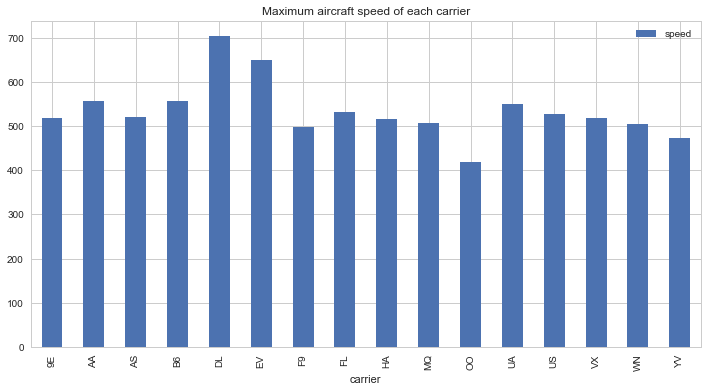

In [18]:
#Maximum speed of Aircraft by carrier

max_speed = carr.groupby(['carrier'])['speed'].max() 
max_speed = max_speed.to_frame()
max_speed.plot(title='Maximum aircraft speed of each carrier',kind='bar', figsize=(12,6))
max_speed.sort_values(by='speed',ascending=False)


**DL has the fastest Aircraft of all**. We could observe that the maximum speed of each carrier touches 500 MpH except **UA and YV** 

<font color=red>**7. Which carrier has the slowest Aircraft?**</font>

,speed
carrier,
US,77.0
B6,85.0
9E,92.0
UA,107.0
AA,117.0
YV,120.0
DL,123.0
EV,123.0
MQ,132.0


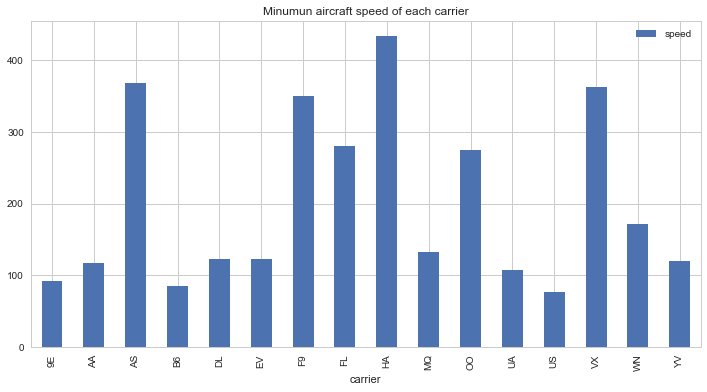

In [116]:
#Minimum speed of Aircraft by carrier

min_speed = carr.groupby(['carrier'])['speed'].min() 
min_speed = min_speed.to_frame()
min_speed.plot(title='Minumun aircraft speed of each carrier',kind='bar', figsize=(12,6))
min_speed.sort_values(by='speed',ascending = True)

**US has the slowest aircraft.** From above, we could see that the 'HA' minimum speed is more than 400 MpH. It seems that HA has the fastest fleet of all. Lets us observe the average speed of each carrier to find the exact answer.

<font color=red>**7. Which carrier has the highest average Aircraft speed?**</font>

,speed
carrier,
HA,433.0
AS,368.0
VX,363.0
F9,350.0
FL,280.0
OO,275.0
WN,172.0
MQ,132.0
DL,123.0


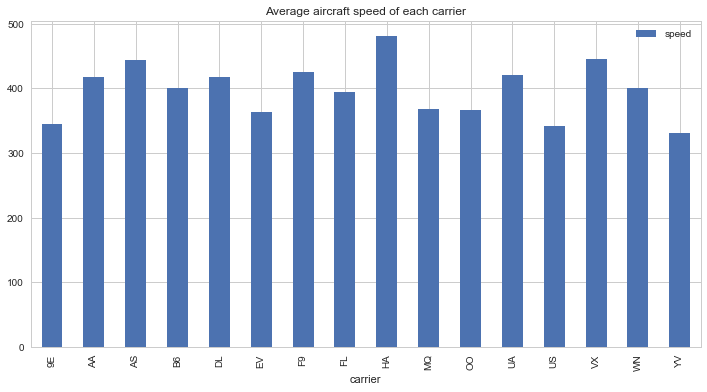

In [118]:
#Average speed of Aircraft by carrier

avg_speed = carr.groupby(['carrier'])['speed'].mean() 
avg_speed = avg_speed.to_frame()
avg_speed.plot(title='Average aircraft speed of each carrier',kind='bar', figsize=(12,6))
min_speed.sort_values(by='speed',ascending = False)

<font color=green>From the above data, we could colclude that **HA** has the fastest fleet of AirCrafts. </font >

<font color=red> **8. How many slow aircrafts each carrier have?**</font>

Here, We consider planes that fly below 250 MpH 

,speed
carrier,
US,1417
9E,1266
EV,967
MQ,709
B6,457
UA,126
AA,111
DL,77
WN,34


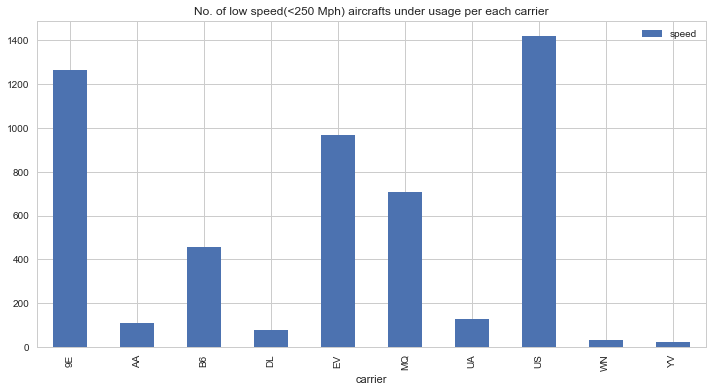

In [122]:
# No. of low speed aircrafts under usage per each carrier

low_speed = carr[(carr.speed < 250)]
low_speed = low_speed.groupby(['carrier'])['speed'].count()
low_speed = low_speed.to_frame()
low_speed.plot(title='No. of low speed(<250 Mph) aircrafts under usage per each carrier',kind='bar', figsize=(12,6))
low_speed.sort_values(by='speed',ascending=False)

Compartively, <font color=red> **US and 9E have the slowest fleet of aircrafts which fly with a speed of 250 Mph or less**</font>

**As mentioned earlier, Speed of AirCraft might depend upon the seasonal weather**

In the below alalysis, we will try to find the varaitions in speed of each carrier based on season

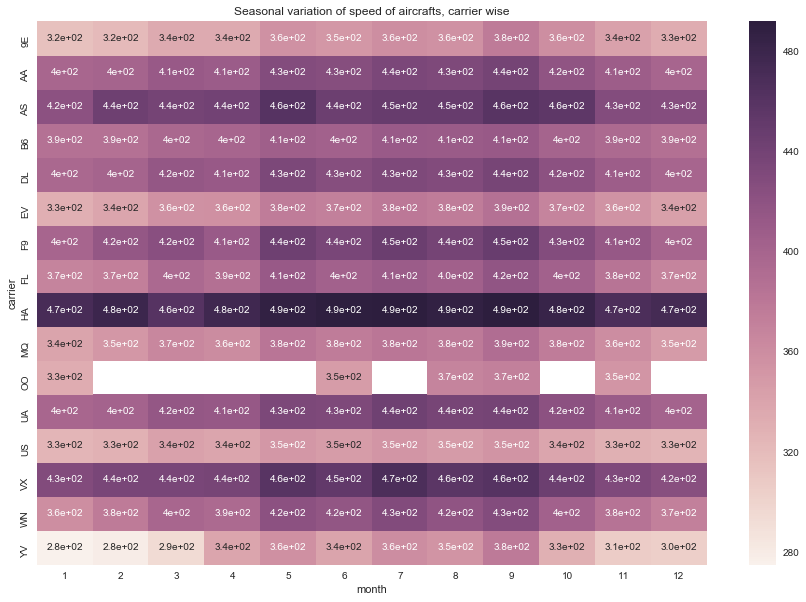

In [129]:
#creating a new data set "Mon_daily" 

Mon_nn = nyfd['air_time'].notnull() & nyfd['dep_time'].notnull() 
season = nyfd[Mon_nn]
season = season.filter(['month','dep_time','carrier','origin','air_time','distance'], axis=1)
season['speed'] = np.round(speed)

mon_speed = season.pivot_table(index="carrier", columns="month", values="speed", aggfunc=np.mean).round()

plt.figure(figsize=(15,10))

sns.heatmap(mon_speed, annot = True)
plt.title("Seasonal variation of speed of aircrafts, carrier wise");

<font color=green> **From the above, we could observe that speed of AirCrafts if less in Winters and much higher in Summer seasons**</font >

**one more starnge insight is that OO was not in operation during specific months of the year**

<font color=red>**10. which carriers often provide airservices for long distance destinations? (distance>1500 miles)** </font >


,distance
carrier,
UA,25757
DL,13885
B6,13262
AA,8226
VX,5162
US,2242
WN,2128
AS,714
F9,682


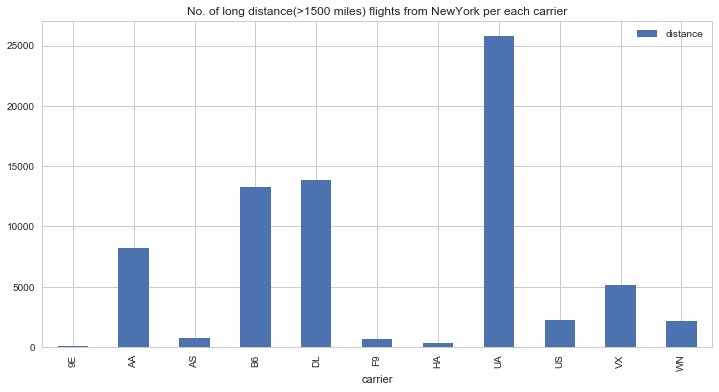

In [130]:
#which carriers often provide airservices for long distance destinations (distance > 1500 miles

long_dist = carr[(carr.distance > 1500)]
long_dist = long_dist.groupby(['carrier'])['distance'].count()
long_dist = long_dist.to_frame()
long_dist.plot(title='No. of long distance(>1500 miles) flights from NewYork per each carrier',kind='bar', figsize=(12,6))
long_dist.sort_values(by='distance',ascending=False)

**From above analysis, we could observe that very few Carries provide services for longer distance. Out of them <font color=green>UA has the highest number of long distance flights floowed by DL and B6**</font >

<font color=red> **11. Is there any depencency of distance and Speed of Aircraft?** </font >

,speed
carrier,
DL,405.846720
AA,405.173103
UA,399.001831
WN,394.931798
FL,394.284969
B6,381.499432
MQ,368.101156
OO,366.093750
EV,362.761394


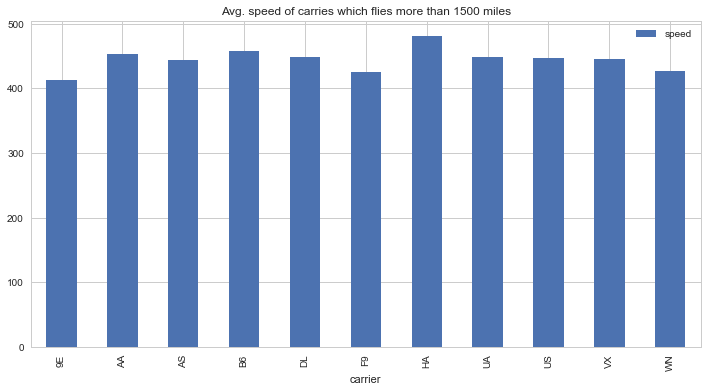

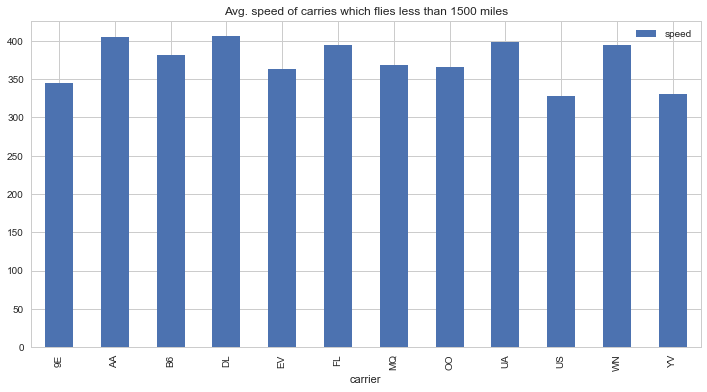

In [131]:
# Speed VS Distance analysis

gt1500 = carr[(carr.distance > 1500)]
gt1500 = gt1500.groupby(['carrier'])['speed'].mean()
gt1500 = gt1500.to_frame()
gt1500.plot(title='Avg. speed of carries which flies more than 1500 miles',kind='bar', figsize=(12,6))
gt1500.sort_values(by='speed',ascending=False)

lt1500 = carr[(carr.distance < 1500)]
lt1500 = lt1500.groupby(['carrier'])['speed'].mean()
lt1500 = lt1500.to_frame()
lt1500.plot(title='Avg. speed of carries which flies less than 1500 miles',kind='bar', figsize=(12,6))
lt1500.sort_values(by='speed',ascending=False)


**From above analysis, we could observe that **

<font color=red> **Fligts which fly longer distances has relatively higher average speeds compared to flights to less distance destinations** </font >

# AIRCRAFT Maintenance Checks

After the manufacturing of an AirCraft, it usually serve for 25-27 years in multiple fields. To sustain for such a huge duration, each aircraft should undergo multiple levels of **Maintenance checks** multiple time.

As per standard Aeronautical industry standard, there are 4 types of maintenance checks:
 1. **A check**
     - This ispPerformed after every 400 - 600 flight hours.
     
 2. **B check**
     - This is performed after every 2000 - 3000 flight hours.
     
 3. **C check**
     - This is performed after every 20 - 24 months. An aircraft undergo this check atleast 12-15 times before it retire.
     
 4. **D Check**
     - This level of check is performed every 6 - 8 years. Any aircraft could undergo maximum of 3-4 D check in during it whole service period. This check involves lot on man power and time.
     
**Let's us analyse the flight ours of each aircraft to estimate the no. of flight hours. Here we consider the 'Tail Number' as reference to estimate the flight hours. As 'Tail Number' is the unique identity registration number of each Aircraft.**

**In the given data set, total of 4043 unique aircrafts are there. Let's proceed further.**

 <font color=red> **12. How many hours an air craft flew in 2013?**</font >

In [132]:
air_year = carr.groupby(['tailnum'])['air_time'].sum()
air_year = air_year.to_frame()
air_year['air_time'] = air_year.air_time/60 #converting total air time into hours
#avg_speed.plot(title='Average aircraft speed of each carrier',kind='bar', figsize=(12,6))
air_year.sort_values(by='air_time',ascending=False)

,air_time
tailnum,
N328AA,2085.033333
N338AA,2057.916667
N327AA,2034.933333
N335AA,2019.783333
N319AA,1871.200000
N323AA,1867.900000
N336AA,1863.416667
N329AA,1834.733333
N324AA,1756.733333


<font color=red> **13. How many flights require A-check maintenance?**</font >

In [69]:
a_check = air_year[(air_year.air_time > 400) & (air_year.air_time < 600)]
a_check.shape
a_check

,air_time
tailnum,
N10575,412.116667
N13248,412.216667
N13716,525.950000
N13718,457.483333
N13750,488.233333
N13949,406.516667
N14118,422.216667
N14219,406.366667
N14230,402.150000


**From above, we could observe that 321 out of 4043 air crafts are in need of A check maintenance**

<font color=red> **14. How many flights require B-check maintenance?**</font >

,air_time
tailnum,
N327AA,2034.933333
N328AA,2085.033333
N335AA,2019.783333
N338AA,2057.916667


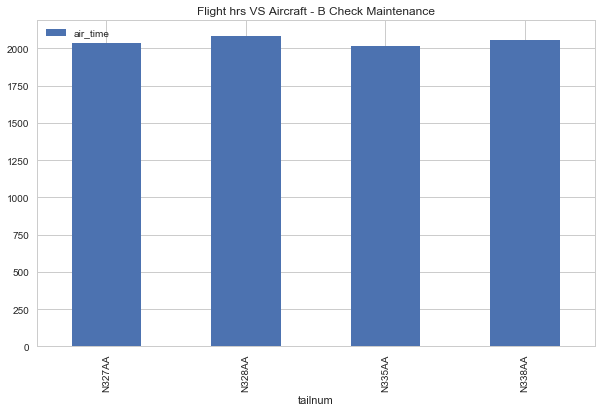

In [70]:
b_check = air_year[(air_year.air_time > 2000) & (air_year.air_time < 6000)]
b_check.plot(title='Flight hrs VS Aircraft - B Check Maintenance',kind='bar', figsize=(10,6))
#b_check.sort_values(by='air_time',ascending=False)
b_check

Out of all the Aircrafts <font color=red>**only four** </font > are in need of B-check maintenance.

**Coming to C- check and D-check maintenance, we couldn't suggest much as the given data set is just for year 2013,it is not possible to decide whether the aircrafts need C check and D check with the given set of data.**

# Haul time analysis

**Haul time is one of the key factors which a passenger keeps an eye before opting for a specific flight.**

Generally, haul time will be more for flights which have many stops during its journey.

**Haul time could be calculated as the difference of Journey time and Air time.**

**Haul time = Journey time - Air time**

In the below analysis, we will be observing the trends in haul time, journey time and air time of each carrier.


<font color=red> **15. What is the Average Haul time of each carrier in the year 2013?**</font >. 

C:\Users\mantri9\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


haul_time    52.522463
dtype: float64


,haul_time
carrier,
YV,52.522463
OO,52.062500
US,48.349939
FL,46.428834
9E,44.476327
MQ,41.536273
B6,37.944157
DL,37.921617
EV,36.068115


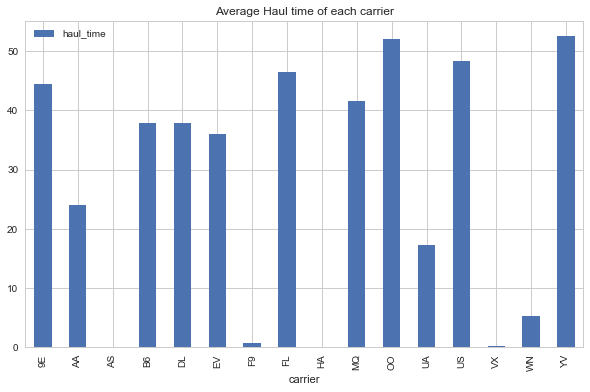

In [138]:
#calculating journey time

def J_Time(d, a):
    dif = a - d
    dif[(dif < 0)] += 2359 #eliminting the 24 hour shift error
    return dif
 
#conversion of hours to minutes
def H_to_M(h):
    m = ((h//100)*60) + (h%100)
    return m

#dropping rows with air_time as Null from NYFD
haul_nn = (nyfd['air_time'].notnull() & nyfd['arr_time'].notnull())
haul = pd.DataFrame(nyfd[haul_nn])

#creating a new dataset with columns 'dep_time', 'arr_time', 'air_time'
haul = haul.filter(['origin', 'carrier', 'dep_time', 'arr_time', 'air_time'])


j1 = pd.DataFrame(J_Time(haul.dep_time, haul.arr_time))
haul['jrn_time'] = j1
haul

j2 = pd.DataFrame(H_to_M(haul.jrn_time))
haul['jtime_mint'] = j2
haul.jtime_mint[(haul.jtime_mint < haul.air_time)] = haul.air_time

haul = haul.filter(['origin', 'carrier', 'air_time', 'jtime_mint'])

htime = pd.DataFrame(haul.jtime_mint -haul.air_time)
haul['haul_time'] = htime
haul

#air time
a_time = haul.groupby(['carrier'])['air_time'].mean() 
a_time = a_time.to_frame()
a_time.sort_values(by='air_time',ascending=False)

#journey time
j_time = haul.groupby(['carrier'])['jtime_mint'].mean() 
j_time = j_time.to_frame()
j_time.sort_values(by='jtime_mint',ascending=False)

#haul time
h_time = haul.groupby(['carrier'])['haul_time'].mean()
h_time = h_time.to_frame()
h_time.sort_values(by='haul_time',ascending=False)

#plotting average haul times of each carrier
h_time.plot(title='Average Haul time of each carrier',kind='bar', figsize=(10,6))

print(h_time.max())
h_time.sort_values(by='haul_time',ascending=False)


We could see that the average haul time of YV and OO are a little higher than the other.

If we observe in reverse, HA and AS have no haul time. This could possiibly be signing of provision of "Direct Flight" by the two carriers.

<font color=red> **16. What is the Average Air time of each carrier in the year 2013?**</font >. 

air_time    623.087719
dtype: float64


,air_time
carrier,
9E,86.825244
AA,188.486022
AS,325.620448
B6,151.041567
DL,173.559094
EV,90.090082
F9,229.589781
FL,101.140491
HA,623.087719


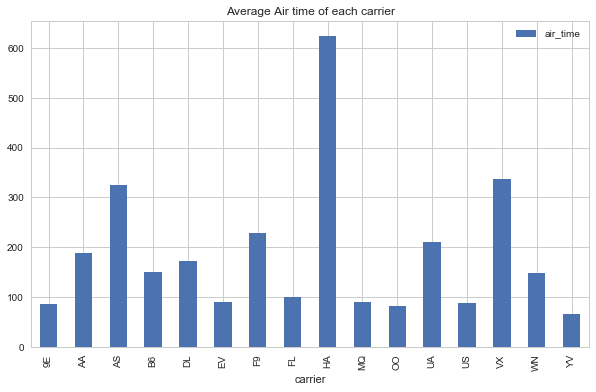

In [139]:
#air time of carrier plot

a_time.plot(title='Average Air time of each carrier',kind='bar', figsize=(10,6))
print(a_time.max())
a_time

<font color=red> **17. Air time VS Journey time, Carrier vise**</font >. 

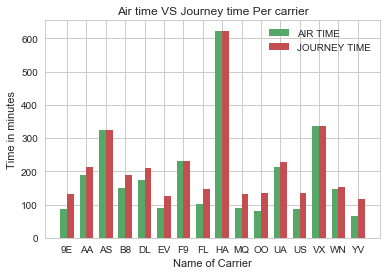

In [141]:
#journey time VS Air time per carrier

N = 16
at = a_time.loc[:,['air_time']].values

ind = np.arange(N)  # the x locations for the groups
width = 0.35      # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, at, width, color='g') #, yerr=men_std)

jt = j_time.loc[:,['jtime_mint']].values
#women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, jt, width, color='r') #, yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_xlabel('Name of Carrier')
ax.set_ylabel('Time in minutes')
ax.set_title('Air time VS Journey time Per carrier')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('9E','AA', 'AS', 'B8', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA', 'US', 'VX', 'WN', 'YV'))

ax.legend((rects1[0], rects2[0]), ('AIR TIME', 'JOURNEY TIME'))

plt.show()


<font color=red> **18. Haul time VS Air time, Carrier vise**</font >. 

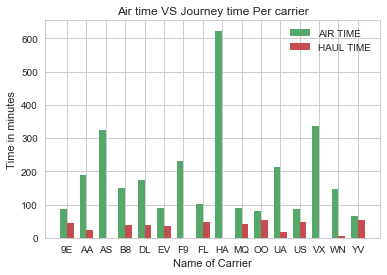

In [90]:
#journey time VS Haul time per carrier

N = 16
at = a_time.loc[:,['air_time']].values

ind = np.arange(N)  # the x locations for the groups
width = 0.35      # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, at, width, color='g') 

ht = h_time.loc[:,['haul_time']].values
rects2 = ax.bar(ind + width, ht, width, color='r')

# add some text for labels, title and axes ticks
ax.set_xlabel('Name of Carrier')
ax.set_ylabel('Time in minutes')
ax.set_title('Air time VS Journey time Per carrier')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('9E','AA', 'AS', 'B8', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA', 'US', 'VX', 'WN', 'YV'))

ax.legend((rects1[0], rects2[0]), ('AIR TIME', 'HAUL TIME'))

plt.show()


From the above two comparisions, it is obvious to observe that **HA, AS, F9 and VX** have zero Haul time which signs for a good and timely service by the carriers.

What is different with the other carriers?

To know this, we should understand that Haul time could possibly be effected by the following factors:

   **- Traffic of an airport**
       Haul time could be observed among flights which have multiple stops.
       
       When an aircraft lands at one of its stop before reaching the destination, it takes time to take off again due the airport traffic.

   **- Weather conditions**
       Bad weather conditions may also lead to longer haul times. This could be seen more during winters.


<font color=red> ** Based on the over all analysis, We could say identify that HA has been more consisting in maintaining its fleet with efficient aircrafts and by providing best services to its passengers.** </font >